In [1]:
import sympy as sym
from os import path
import sympy.physics.mechanics as me
from sympy.abc import t
import moyra as ma
me.mechanics_printing()

In [2]:
DoFs = 1
# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)
p.DoFs  = ma.ModelSymbol(value = DoFs,string = 'DoFs')
#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')    
p.L = ma.ModelSymbol(value = 0,string = 'L') # The stationary point# gravity
p.m = ma.ModelSymbol(value = 0,string = 'm') # The stationary point
p.I_xx = ma.ModelSymbol(value = 0,string = 'I_xx') # The stationary point

In [3]:
frame = ma.frames.HomogenousFrame().R_x(-p.q[0]).Translate(0,0,p.L).simplify()

In [4]:
M = ma.elements.MassMatrix(p.m,p.I_xx,0,0,0,0,0)
ele = ma.elements.RigidElement(p.q,frame,M,grav_vec = sym.Matrix([0,0,p.g]))

In [5]:
sm = ma.SymbolicModel.FromElementsAndForces(p.q,ele)

Generating EoM for Element 1 out of 1 - default:RigidElement


In [6]:
base_dir = "D:\\AlphaBetaData\\EoM"
class_name = "Simple_pendulum"
base_class = "mbd.BaseMBD"
sm.to_matlab_class(p,base_dir,class_name,base_class)

In [7]:
sm.f

In [8]:
sm.M

In [9]:
sm_lin = sm.subs({sym.sin(p.q[0]):p.q[0]})

In [10]:
sm_lin.f

In [17]:
a = sym.solvers.ode.dsolve(sm_lin.M[0]*p.qdd[0]+sm_lin.f[0],p.q[0],isc={p.q[0]:1,p.qd[0]:0})

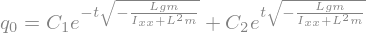

In [18]:
a
